## Code along- overfitting and underfitting
- Simulate data

$y= a_0 + a_1x + a_2x^2 + \epsilon$

where $\epsilon \sim \mathcal{N}(0,1)$ (the error is standard normal distrubuted)

In [176]:
import numpy as np
import matplotlib.pyplot as plt

In [177]:
samples = 100
X= np.random.uniform(-3, 3, (samples, 1))
X

array([[ 0.76538551],
       [ 1.51455942],
       [-0.74873951],
       [ 1.78107388],
       [-2.03318369],
       [-2.7961792 ],
       [-0.92214705],
       [ 1.72591889],
       [ 1.15356028],
       [-2.59720326],
       [-1.50906776],
       [ 0.23663927],
       [-1.58903623],
       [ 0.07614627],
       [-2.16573022],
       [-1.55151807],
       [-1.84001455],
       [ 0.90031132],
       [-2.51732822],
       [-2.50739652],
       [ 0.91461756],
       [ 1.13659156],
       [-2.68697131],
       [-2.25106071],
       [ 1.09137989],
       [ 1.24656974],
       [ 1.95327786],
       [ 1.72274531],
       [ 1.65825912],
       [ 0.49868713],
       [-1.96346421],
       [-0.22106887],
       [-1.02883313],
       [ 1.43379249],
       [-0.76402554],
       [-2.08894924],
       [ 1.43370487],
       [ 0.53010302],
       [ 2.23499649],
       [ 2.47716078],
       [ 2.60331547],
       [-1.78409813],
       [-1.29799427],
       [ 2.54820502],
       [-2.57467104],
       [-0

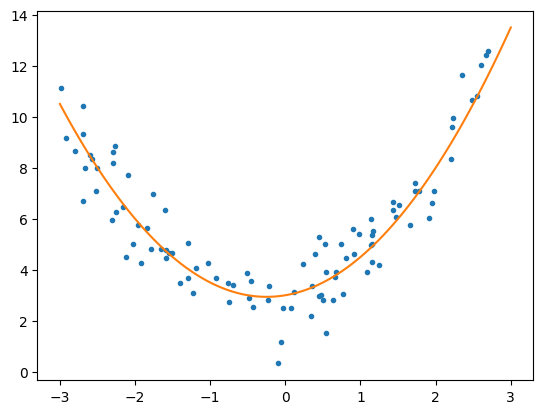

In [178]:
# a0 = 3, a1 = 0.5, a2 = 1
f= lambda x: x**2 + 0.5*x + 3
y= f(X) + np.random.randn(samples, 1)


x= np.linspace(-3, 3, samples)
plt.plot(X,y, ".")
plt.plot(x, f(x))

<Axes: title={'center': '$y = x^2+0.5x+3+\\epsilon$'}>

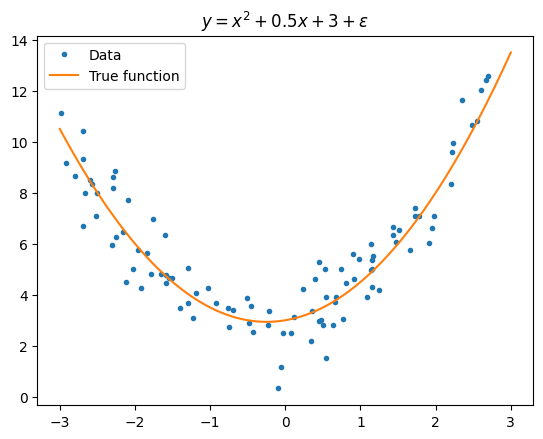

In [179]:
def draw_data():
    fig, ax= plt.subplots()
    ax.plot(X, y, ".", label= "Data")
    ax.plot(x, f(x), label= "True function")
    ax.set(title= r"$y = x^2+0.5x+3+\epsilon$")
    ax.legend()
    return ax
    
draw_data()

## Polynomial regression

In [180]:
X[:5], X.shape

(array([[ 0.76538551],
        [ 1.51455942],
        [-0.74873951],
        [ 1.78107388],
        [-2.03318369]]),
 (100, 1))

In [181]:
from sklearn.preprocessing import PolynomialFeatures

poly= PolynomialFeatures(degree= 2, include_bias= False)

poly_features= poly.fit_transform(X)
poly_features[:5], poly_features.shape

(array([[ 0.76538551,  0.58581498],
        [ 1.51455942,  2.29389022],
        [-0.74873951,  0.56061085],
        [ 1.78107388,  3.17222415],
        [-2.03318369,  4.13383593]]),
 (100, 2))

## Train on trasformed dataset

- Use multiple linear regression on our polynomial features
- This gives us polynomial regression of second order

In [182]:
from sklearn.linear_model import LinearRegression

model= LinearRegression()
model.fit(poly_features, y)

# Estimated: a1,a2 from data, note that true value was a1=0.5, a2=1

model.coef_

array([[0.58008509, 1.02743904]])

In [183]:
# Estimated a0 from data, note that true a0= 3
model.intercept_

array([2.97304492])

## Visualise true model and estimated model

In [184]:
# x is our linspace, its 1 dimentional
x[:5], x.shape

(array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576]),
 (100,))

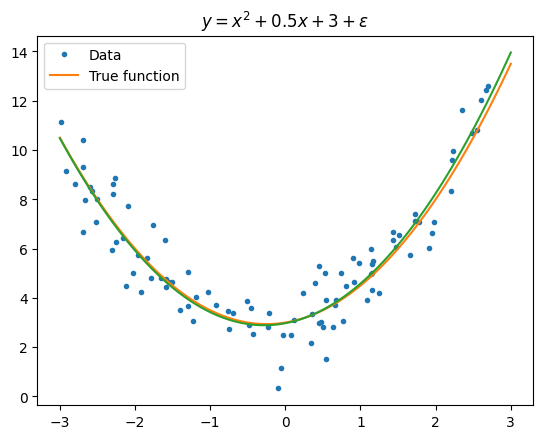

In [185]:

x_poly_features= poly.transform(x.reshape(-1, 1))
y_pred = model.predict(x_poly_features)

ax= draw_data()

ax.plot(x, y_pred, label= "model")

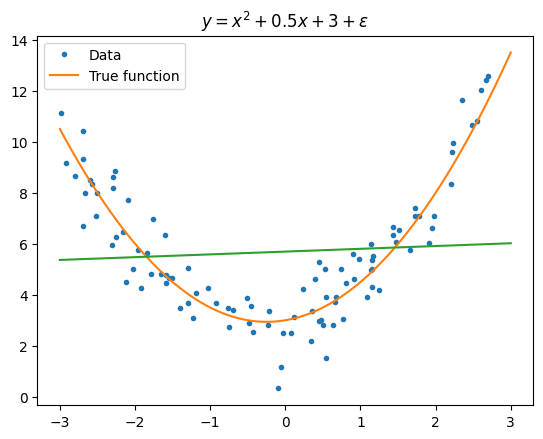

In [186]:
model= LinearRegression()
model.fit(X, y)
ax= draw_data()
ax.plot(x, model.predict(x.reshape(-1, 1)))

## Overfitting

In [187]:
poly_model_30 = PolynomialFeatures(30, include_bias= False)
X_features= poly_model_30.fit_transform(X)
X_features.shape

(100, 30)

In [188]:
x_poly_features= poly_model_30.transform(x.reshape(-1, 1))
x_poly_features.shape

(100, 30)

[(-1.0, 15.0), Text(0.5, 1.0, 'Overfitted model')]

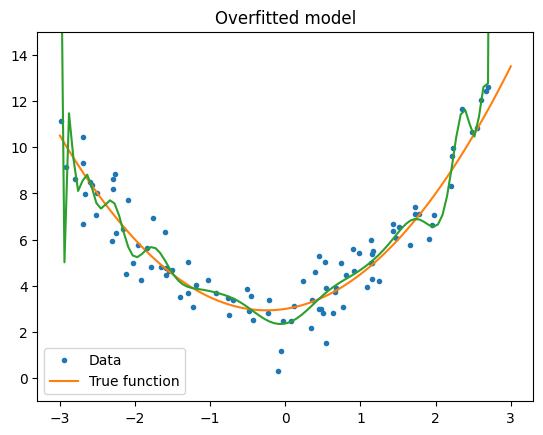

In [189]:
model= LinearRegression()
model.fit(X_features, y)
y_pred= model.predict(x_poly_features)

ax= draw_data()
ax.plot(x, y_pred)
ax.set(ylim=[-1, 15], title= "Overfitted model")

## Choose a model

In [190]:
samples = 10000

X= np.random.uniform(-3, 3, (samples, 1))
X

array([[ 2.90831065],
       [-2.19420792],
       [-1.13648714],
       ...,
       [ 1.64871284],
       [ 1.34049924],
       [-0.50320845]])

In [191]:
f= lambda x: x**4 + x**2 + .5*x + 3
y= f(X) + np.random.randn(samples, 1)
y.shape

(10000, 1)

## Train validation test split

Split dataset into
- Train train on training set
- Validation tune hyperparameter on validation set
- Test evaluate on test set
  
In our case degree is a hyperparameter

In [192]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=42)

# Use test set and take cap off it to use as test and half as validation
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size= 0.5, random_state=42)

#2/3 = Train, 1/3/2 = val 1/3/2 test
X_train.shape, X_val.shape, X_test.shape

((6700, 1), (1650, 1), (1650, 1))

## Train model and predisct on validation

In [193]:
from sklearn.metrics import mean_squared_error

RMSE_val= []

for degree in range(1, 100):
    model_poly= PolynomialFeatures(degree, include_bias= False)

    # Feature engineering
    train_features= model_poly.fit_transform(X_train)
    val_features= model_poly.fit_transform(X_val)

    # Polynomial regression
    model_linear_regression= LinearRegression()
    model_linear_regression.fit(train_features, y_train)

    y_pred_val= model_linear_regression.predict(val_features)
    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

[Text(0.5, 0, 'Degree'),
 Text(0, 0.5, 'RMSE'),
 Text(0.5, 1.0, 'RMSE on validation data for diffrent degrees of polynomials')]

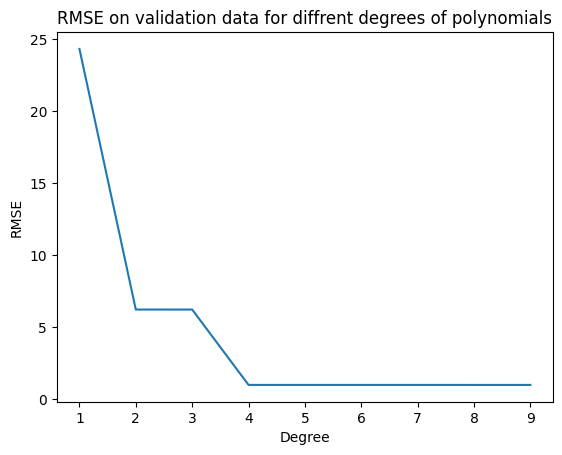

In [194]:
fig, ax = plt.subplots()
ax.plot(range(1, 10), RMSE_val[:9])
ax.set(
    xlabel="Degree",
    ylabel="RMSE",
    title= "RMSE on validation data for diffrent degrees of polynomials",
)
# Vi väljer degree 4